In [5]:
from fk_filtering.models.Regime_Switching import Net
from fk_filtering import *

utils.fix_rng(10)
model_ = Net.PF([-0.1, -0.3, -0.5, -0.9, 0.1, 0.3, 0.5, 0.9], [0, -2, 2, -4, 0, 2, -2, 4], 0.1, Net.Polya_Switching(8, 'Boot'), 'Boot', 'cuda')
sim_object = model.Simulated_Object(model_, 100, 50, 1, 'cuda')
sim_object.save('./fk_filtering/models/Regime_Switching/data/polya/', 50, 20, '')

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [ ]:
x= 2
l = [x]
x=3
print(l)

In [6]:
a = pt.arange(5., requires_grad= True)
b = pt.arange(5., requires_grad= True)
c = a**2 + b
c = c-b
c = pt.sum(c)
c.backward()
print(a.grad)
print(b.grad)


tensor([0., 2., 4., 6., 8.])
tensor([0., 0., 0., 0., 0.])


In [1]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Regime_Switching import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import Supervised_L2_Loss
loss = Supervised_L2_Loss(lambda x: x)
train_model = Net.Generates_0(device=device)
DPF = simulation.Differentiable_Particle_Filter(train_model, 2000, Soft_Resampler_Systematic(1), 2000)
reporter = Filtering_Mean(lambda x: x[:,:,0].unsqueeze(2))
data = SimulatedDataset('./fk_filtering/models/Regime_Switching/data/', lazy = True)
'''
for i, j in enumerate(pt.utils.data.DataLoader(data, 10, shuffle=True, collate_fn=data.collate)):
    if i == 1:
        break
    DPF.initialise(j)
    DPF.eval()
    DPF.display_particles(50, [0,1])
'''
training.test(DPF, loss, [reporter], 50, data, 10)

AttributeError: module 'fk_filtering.models.Regime_Switching.Net' has no attribute 'Generates_0'

In [1]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Regime_Switching import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import Supervised_L2_Loss


loss = Supervised_L2_Loss(lambda x: x[:, :, 0].unsqueeze(2))
data = model.State_Space_Dataset('./fk_filtering/models/Regime_Switching/data/markov', lazy = True, device='cuda', num_workers=0)
utils.fix_rng(11)
#train_model = Net.RSDBPF(8, Net.NN_Switching(8, 8, 'cuda'), 'Uni',  device='cuda')
train_model = Net.PF([-0.1, -0.3, -0.5, -0.9, 0.1, 0.3, 0.5, 0.9], [0, -2, 2, -4, 0, 2, -2, 4], 0.1, Net.Markov_Switching(8, 0.8, 0.15, 'Boot'), 'Boot', 'cuda')
DPF = simulation.Differentiable_Particle_Filter(train_model, 200, Soft_Resampler_Systematic(1), 200, 'cuda')
reporter = Predictive_Mean(lambda x: x[:,:,0].unsqueeze(2))
result = training.e2e_train(DPF, loss, [reporter], 50, data, 100, 0.5, 60, 0.05, 1, True)

ModuleNotFoundError: No module named 'results'

In [68]:
from fk_filtering.models.Regime_Switching import Net
from fk_filtering.utils import normalise_log_quantity
from fk_filtering.resampling import Soft_Resampler_Systematic
model = Net.PF([-0.1, -0.3, -0.5, -0.9, 0.1, 0.3, 0.5, 0.9], [0, -2, 2, -4, 0, 2, -2, 4], 0.1, Net.Markov_Switching(8, 0.8, 0.15, 'Uni'), 'Uni',  device=device)
x_t_1 = pt.tensor([2, 2], device=device).expand(1, 100, 2)
model.y = pt.tensor([0.045], device=device)
x_t = model.M_t_proposal(x_t_1, 0)
weights = normalise_log_quantity(model.log_G_t_guided(x_t, x_t_1, 0))
re = Soft_Resampler_Systematic(1)
x_t_re, _, _ = re(x_t, weights)
print(pt.std(x_t_re).item())

1.9013347625732422


In [ ]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Regime_Switching import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import Supervised_L2_Loss
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

loss = Supervised_L2_Loss(lambda x: x[:, :, 0].unsqueeze(2))
data = SimulatedDataset('./fk_filtering/models/Regime_Switching/data/markov/', lazy = True)
seed_everything(1)
#train_model = Net.RSDBPF(8, Net.Markov_Switching(8, 0.8, 0.15, 'Uni'), 'Uni', 0,  device=device)
NN = Net.LSTM(1, 20, 1, 1)
result = training.train_nn(NN, loss, 50, data, 100, 0.5, 100, 0.05, True)

In [ ]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Regime_Switching import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import Supervised_L2_Loss
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

loss = Supervised_L2_Loss(lambda x: x[:, :, 0].unsqueeze(2))
data = SimulatedDataset('./fk_filtering/models/Regime_Switching/data/polya/', lazy = True)
def run(models):
    seed_everything(11)
    train_model = Net.RSDBPF(models, Net.NN_Switching(models, models), 'Uni', device=device)
    DPF = simulation.Differentiable_Particle_Filter(train_model, 200, Soft_Resampler_Multinomial(1), 200, loss, 10)
    reporter = Filtering_Mean(lambda x: x[:,:,0].unsqueeze(2))
    result = training.e2e_train(DPF, loss, [reporter], 50, data, 100, 0.5, 60, 0.05, 100, False)
    return result

training.grid_search(run, {'models': [6, 7, 8, 9, 10, 11],})

In [ ]:
for n, p in DPF.named_parameters():
    print(f'{n}: {p}')


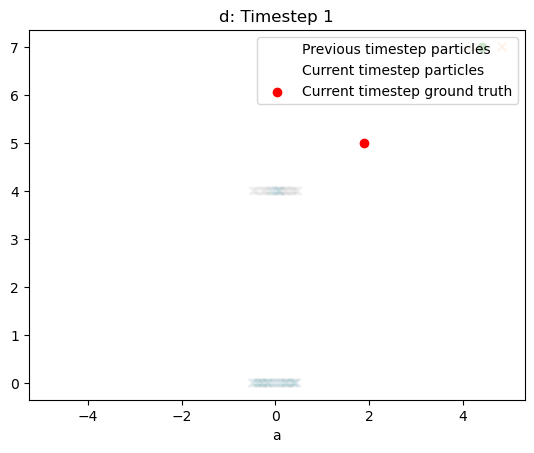

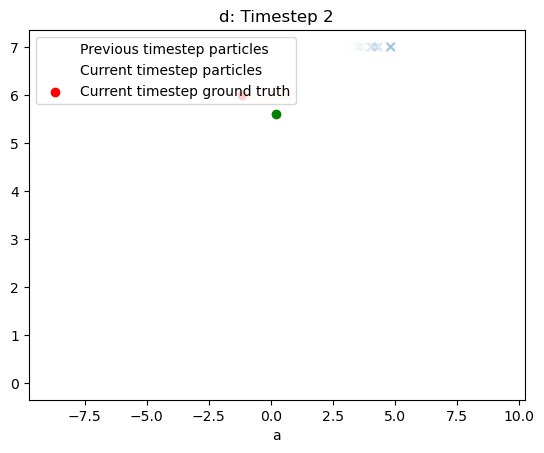

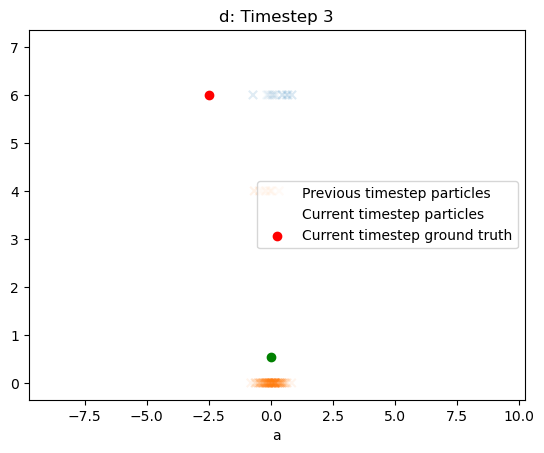

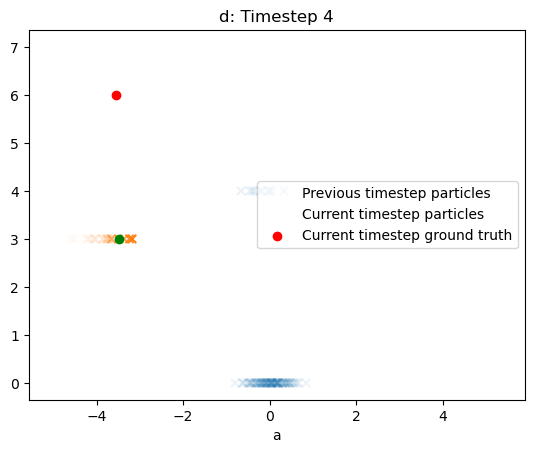

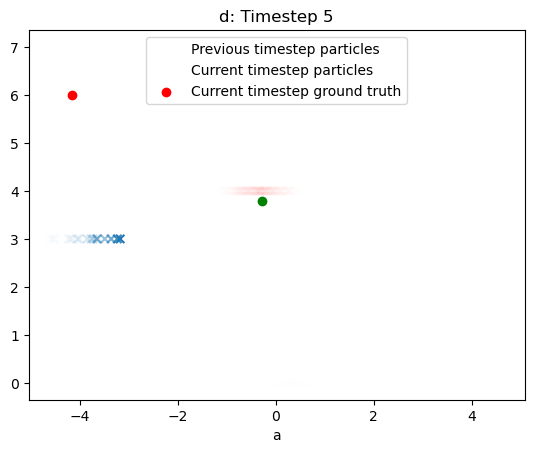

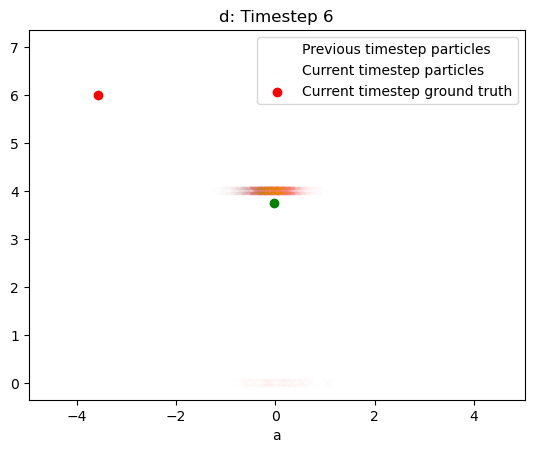

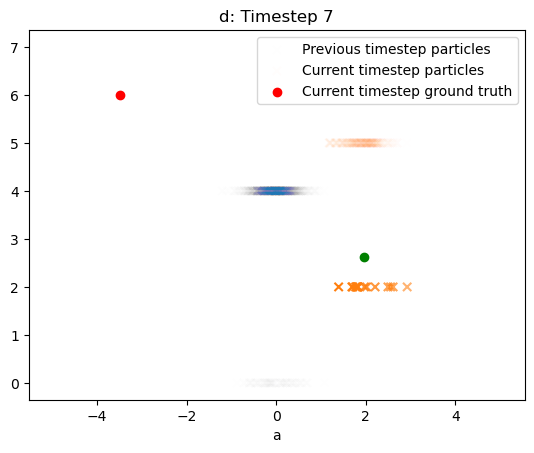

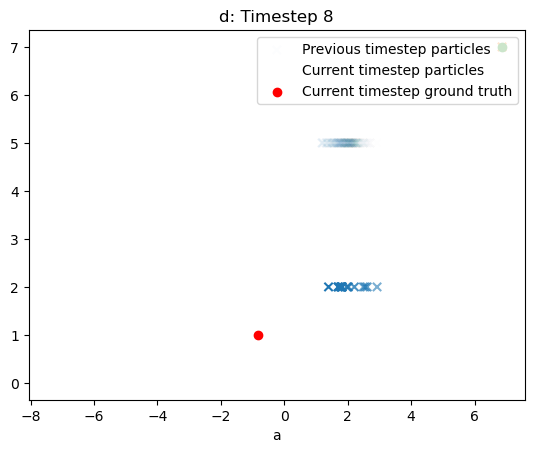

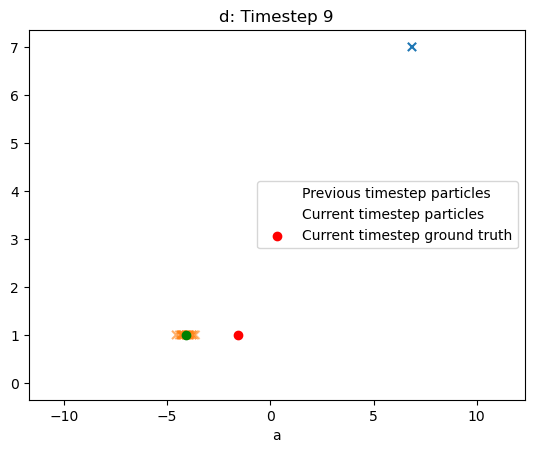

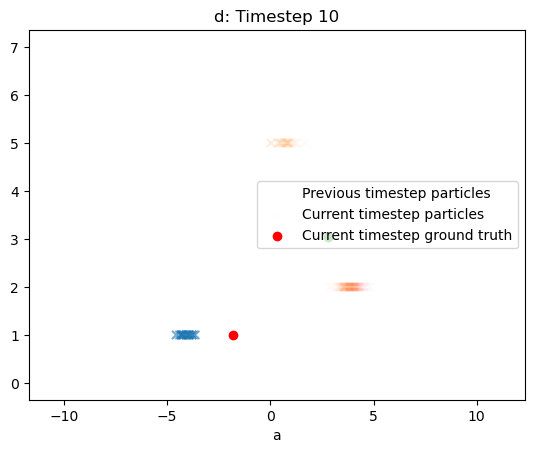

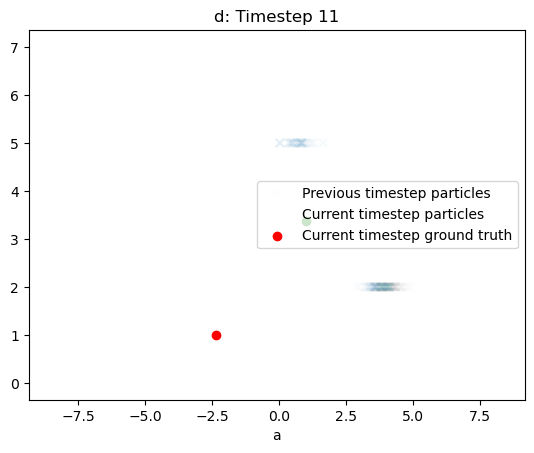

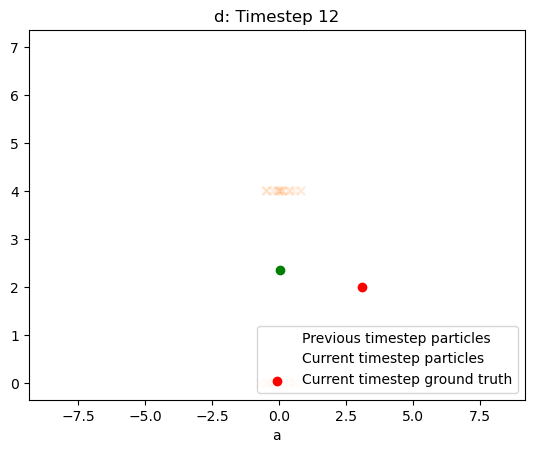

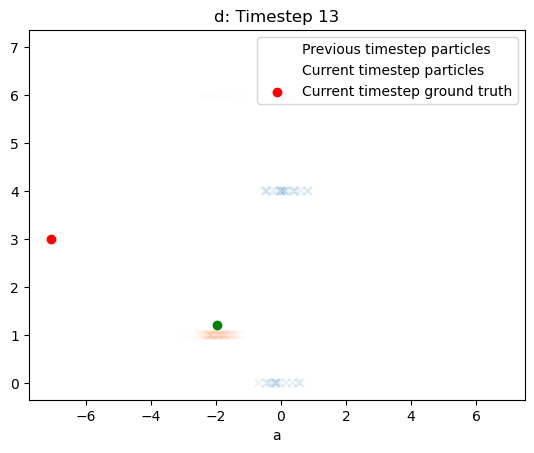

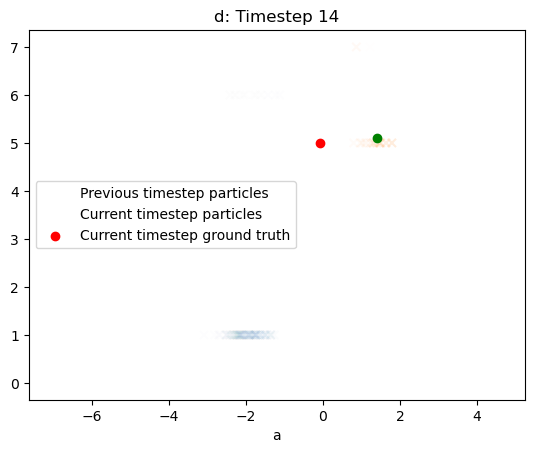

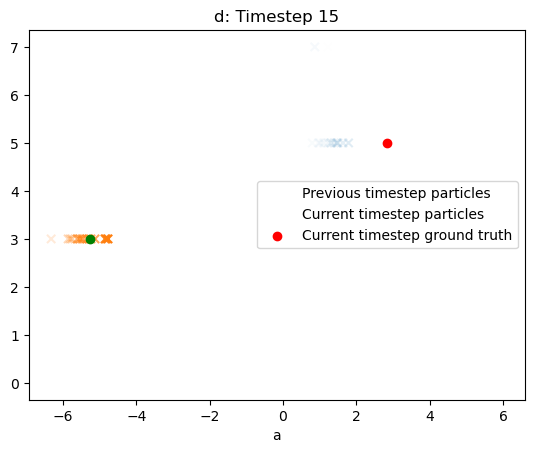

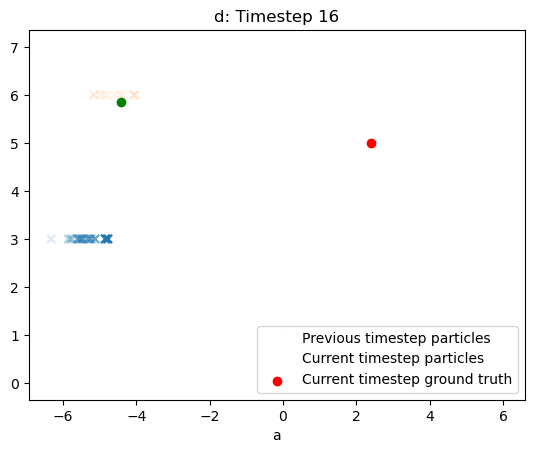

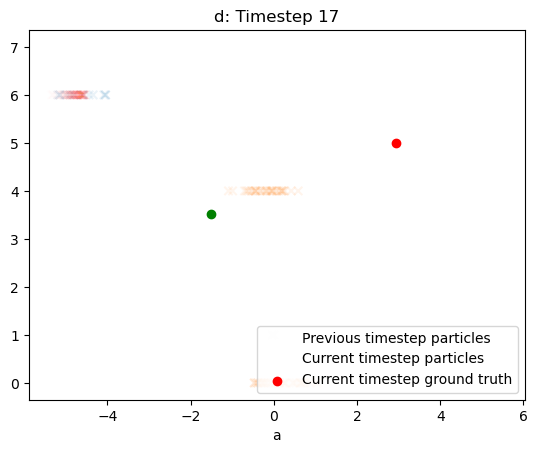

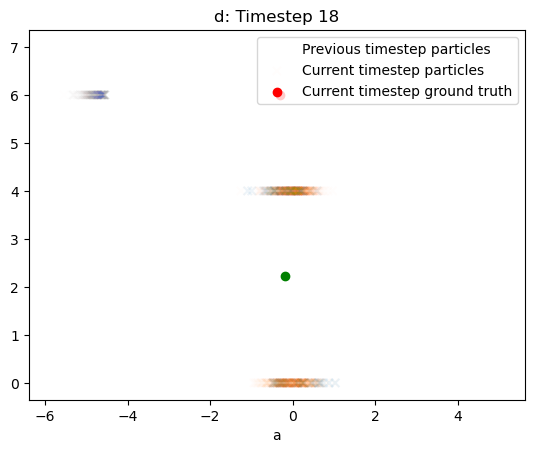

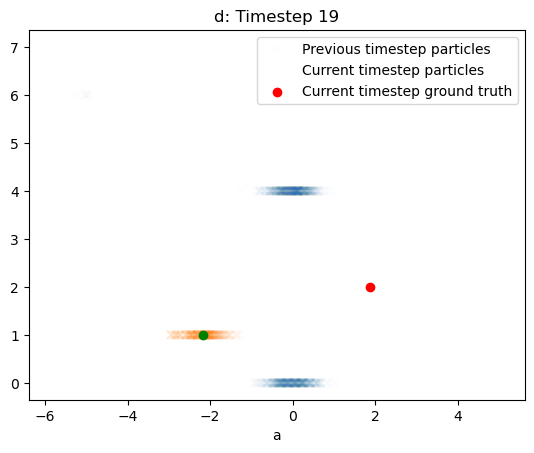

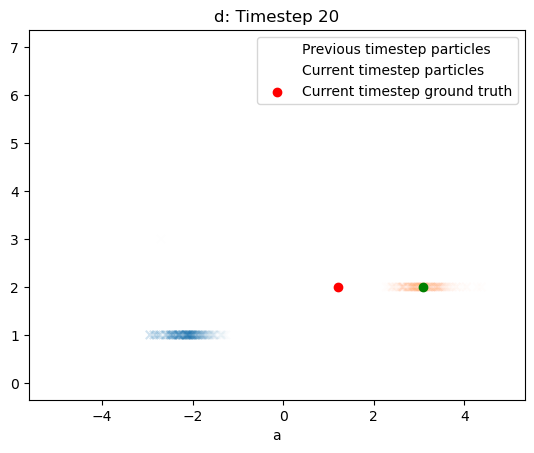

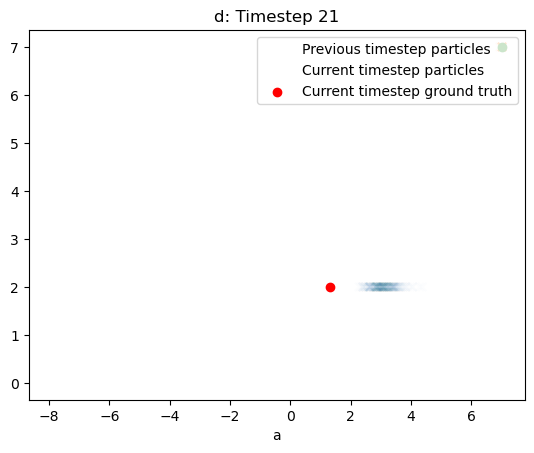

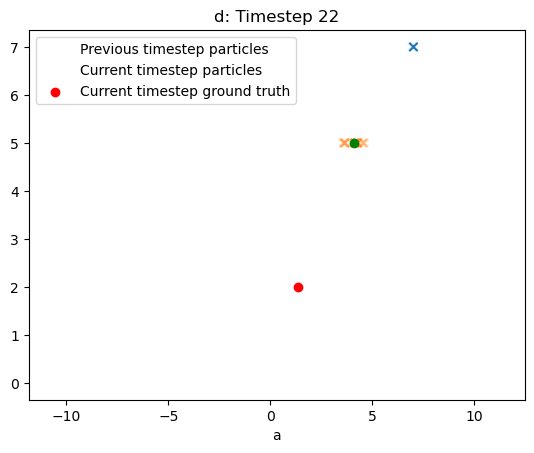

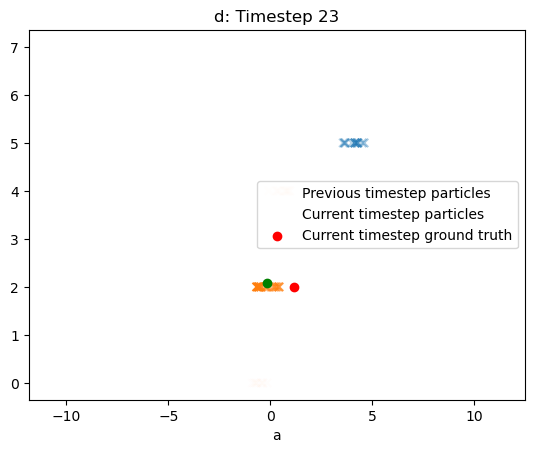

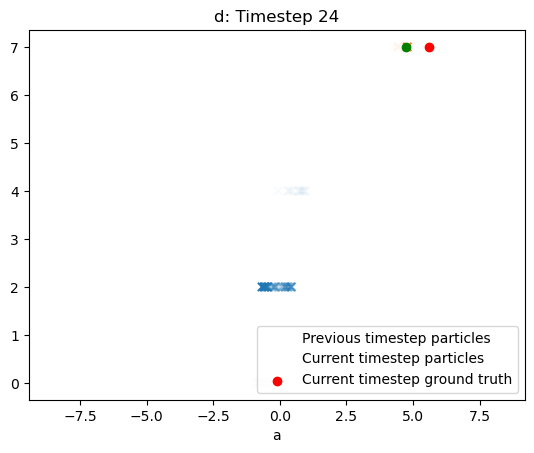

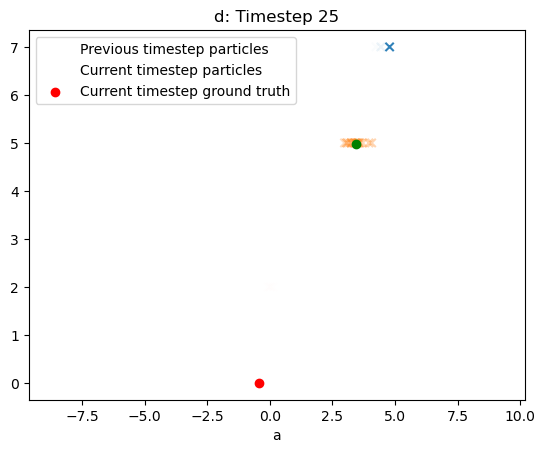

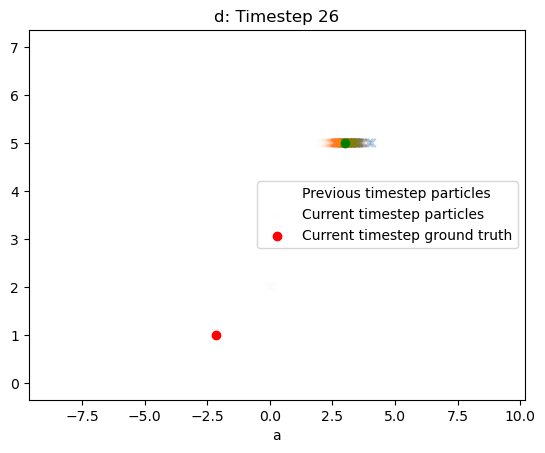

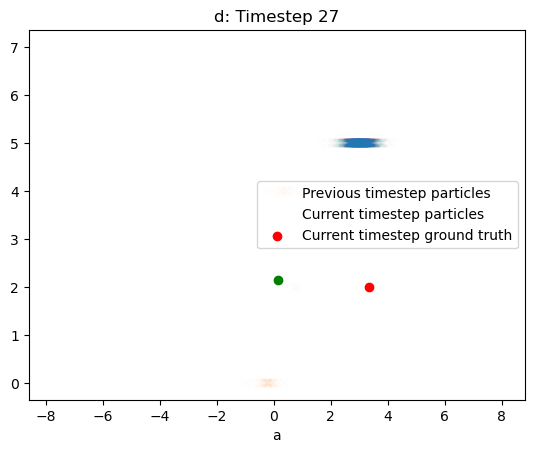

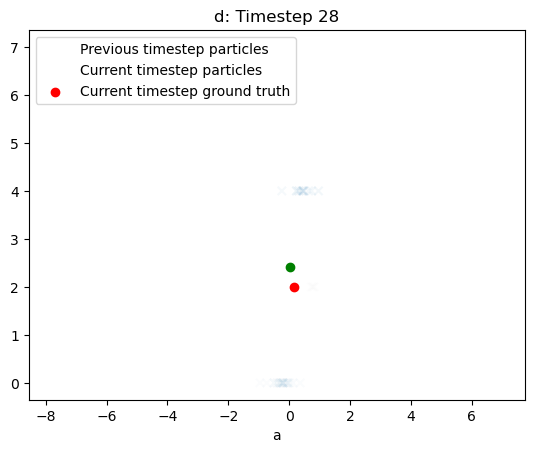

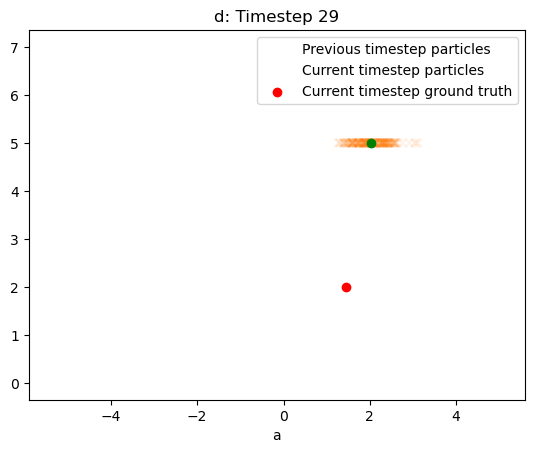

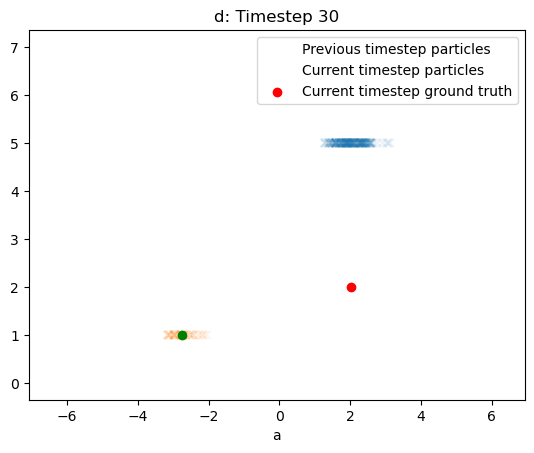

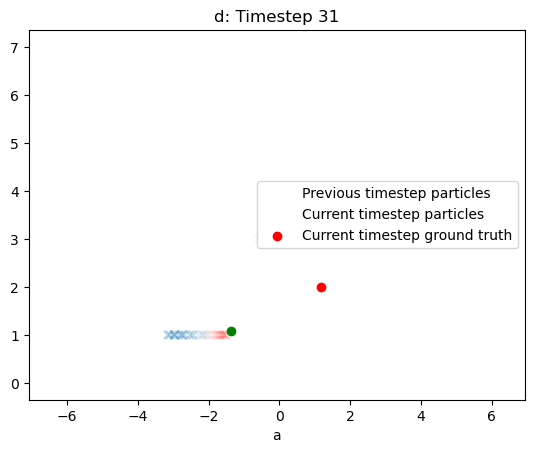

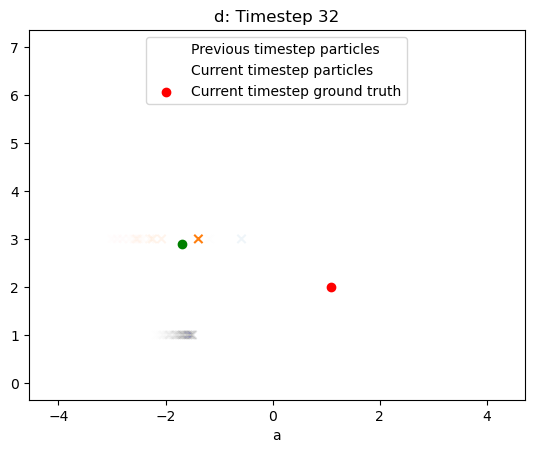

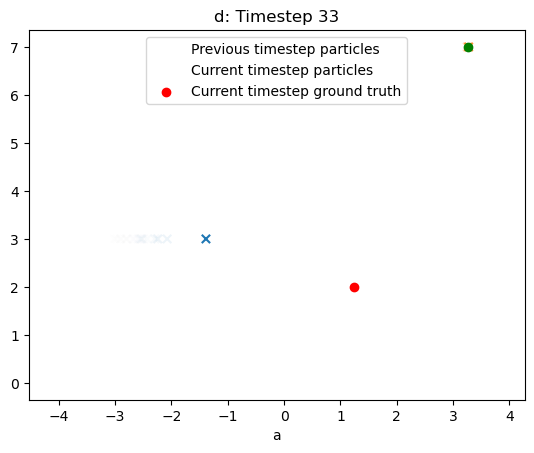

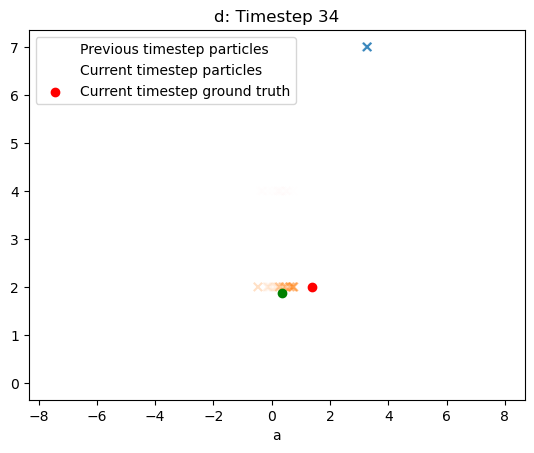

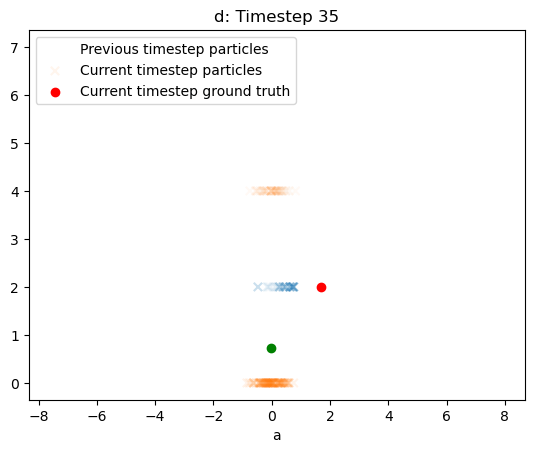

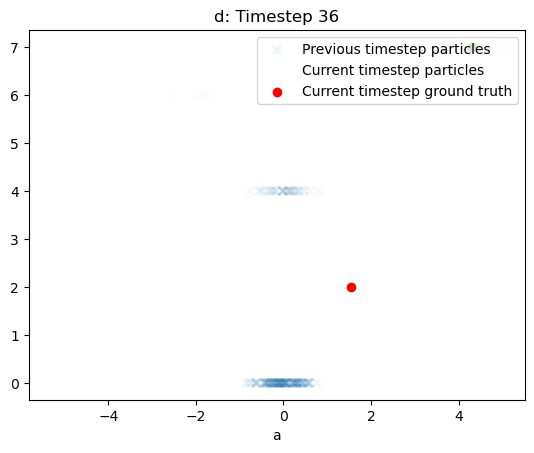

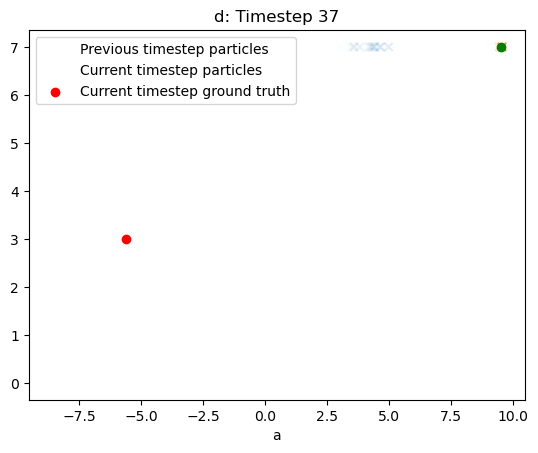

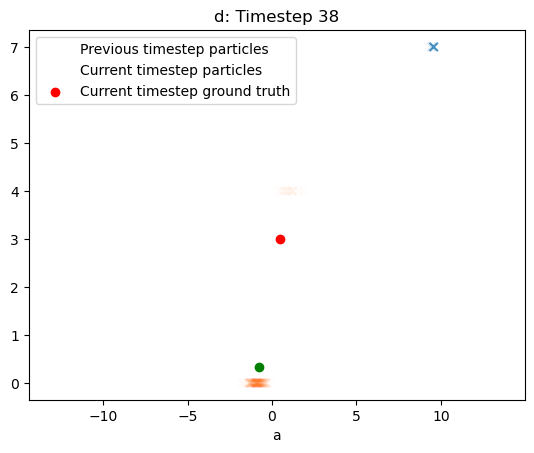

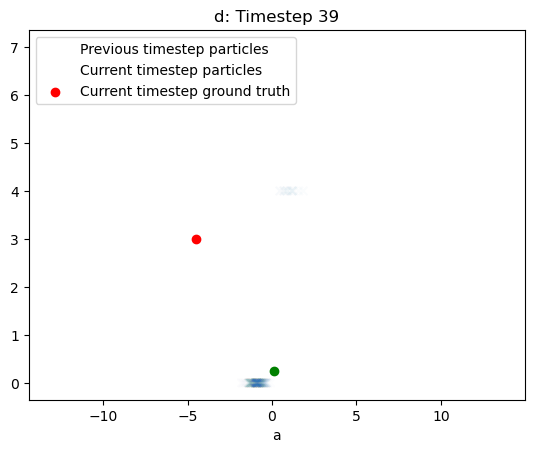

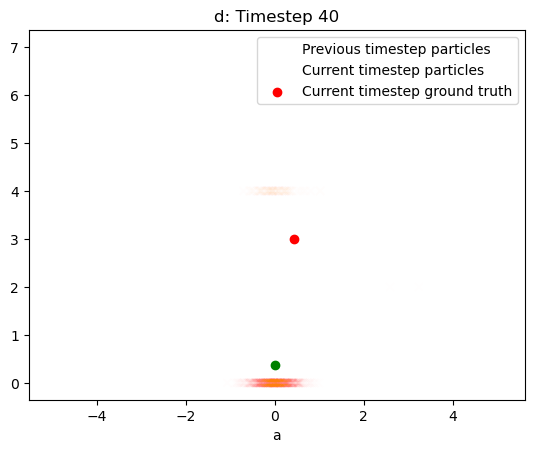

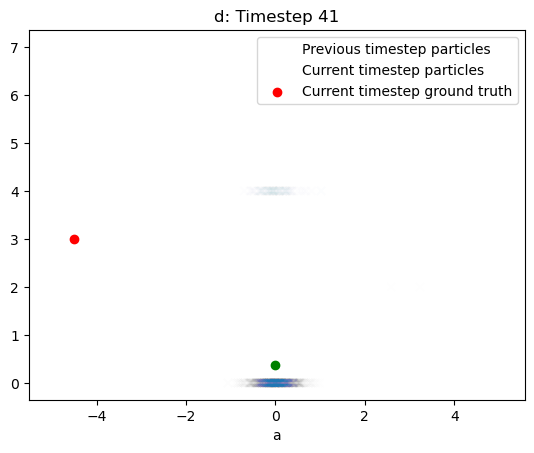

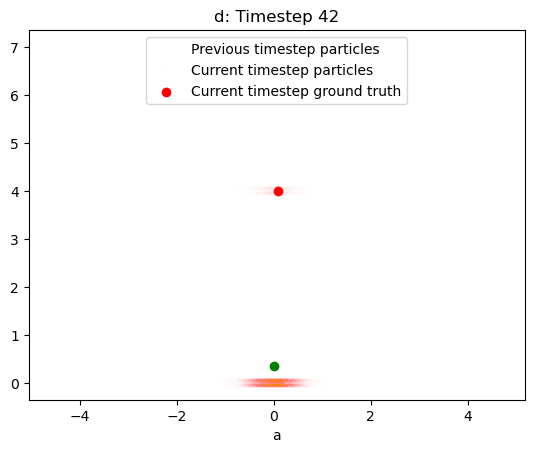

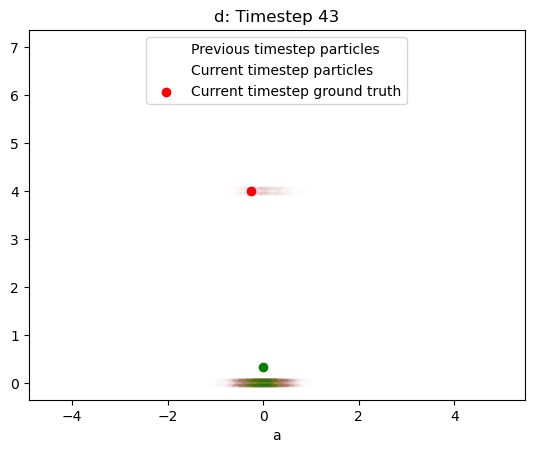

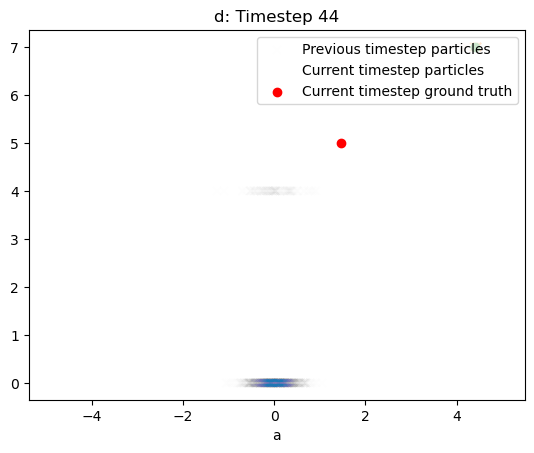

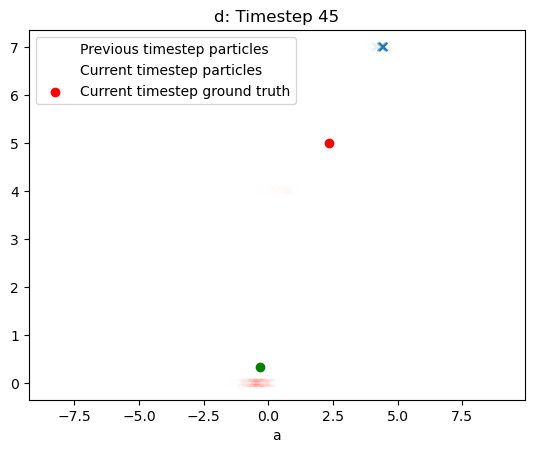

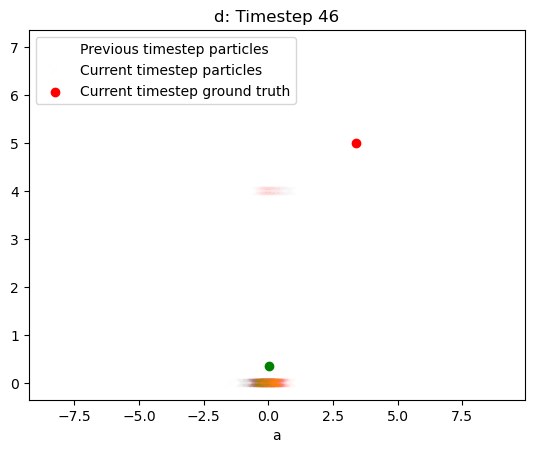

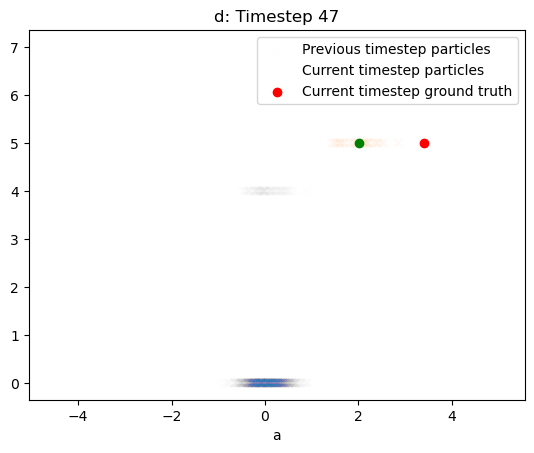

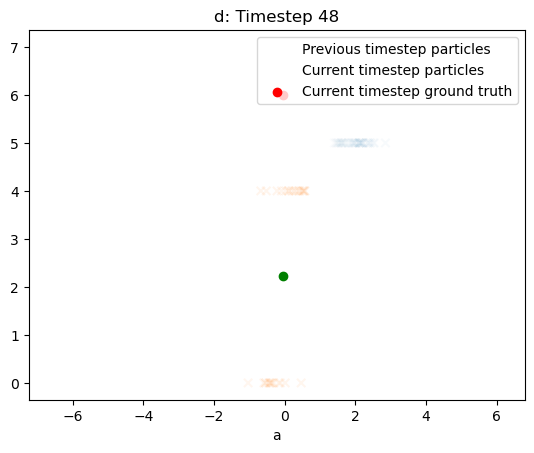

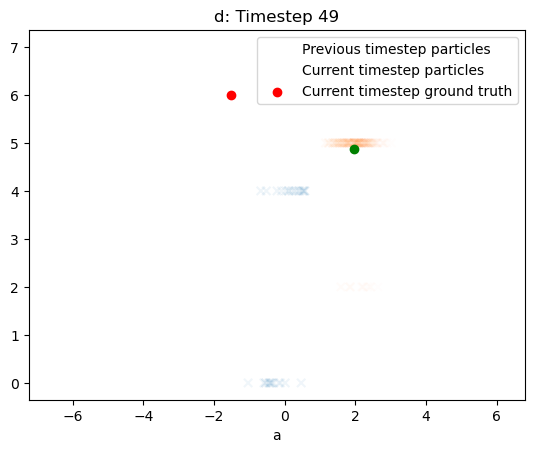

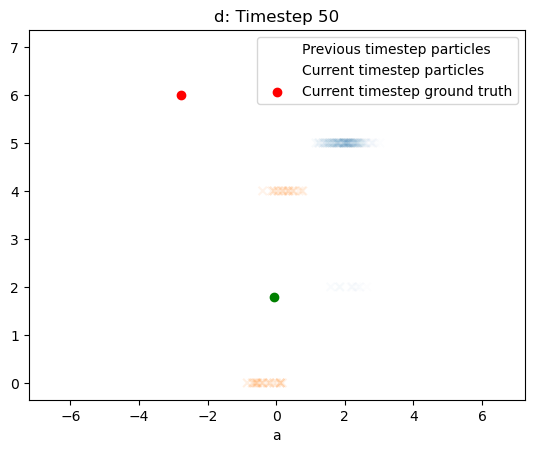

In [4]:
DPF.model.guided=True
for i, j in enumerate(pt.utils.data.DataLoader(data, 10, shuffle=True, collate_fn=data.collate)):
    if i == 1:
        break
    DPF.initialise(j)
    DPF.eval()
    DPF.display_particles(50, [0,1], ('a', ''), 'd')